Fourier transform ignores phase of the wave.  But the FFT also gives you phase information!  Hard to interpret though.

(Missed the first 7 cells of the lesson)

In [1]:
import numpy as np
from scipy.fftpack import fft, fftn, fftfreq, fftshift
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
#peaks = find_peaks(freq_y)
#peaks

In [2]:
f = 1/2
n_samples = 200
x = np.linspace(-10, 10, n_samples)
# Simple sine wave.
y = np.sin(x * f * np.pi)
fy = fft(y)
print(fy[0:5])
# We get a complex number back.
# Engineers use j instead of i.
# Could be because 3 dimensions use x, y, z as i, j, k,
# and we're looking at the second dimension, y.

[-2.55351296e-15+0.j         -3.24801485e-03+0.20675804j
 -1.48260741e-02+0.47177333j -4.36217022e-02+0.92499596j
 -1.36224072e-01+2.16521961j]


In [3]:
fy[1].real

-0.0032480148465404285

In [4]:
# This doesn't give us the "j" back:
fy[1].imag

0.20675804037954792

In [5]:
fy[0:5]

array([-2.55351296e-15+0.j        , -3.24801485e-03+0.20675804j,
       -1.48260741e-02+0.47177333j, -4.36217022e-02+0.92499596j,
       -1.36224072e-01+2.16521961j])

In [6]:
magnitude = np.abs(fy)
magnitude[0:5]

array([2.55351296e-15, 2.06783551e-01, 4.72006235e-01, 9.26023964e-01,
       2.16950063e+00])

In [7]:
# Any purely negative number is pi
# Any purely positive number is zero.
phase = np.angle(fy)
phase[0:5]

array([3.14159265, 1.58650429, 1.60221225, 1.61792022, 1.63362818])

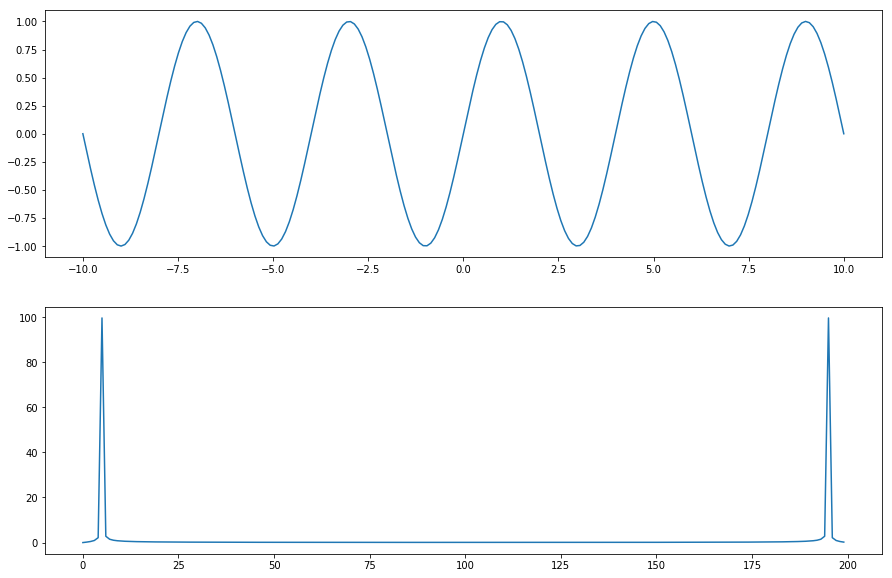

In [8]:
# Make a 2 row plot.
fig, ax = plt.subplots(nrows=2, figsize=(15, 10))
ax[0].plot(x, y)
ax[1].plot(np.abs(fy))  # Our x frequency is 1/2 hertz.
# Why do we have these 2 peaks so far apart?
# This is why we use fftshift and fftfreq.

In [9]:
# Size of the entire range divided by length.
# This is for the general case of non-evenly spaced samples.
interval_avg = (x[-1] - x[0]) / (x.size - 1)
print(interval_avg)
print(fftfreq(n_samples, interval_avg)[0:5])
# We need fftshift because fftfreq returns values in a weird way:
# It returns zero, then all negative, then all positive!
print(fftshift(fftfreq(n_samples, interval_avg))[0:5])
x_values = fftshift(fftfreq(n_samples, interval_avg))

0.10050251256281408
[0.      0.04975 0.0995  0.14925 0.199  ]
[-4.975   -4.92525 -4.8755  -4.82575 -4.776  ]


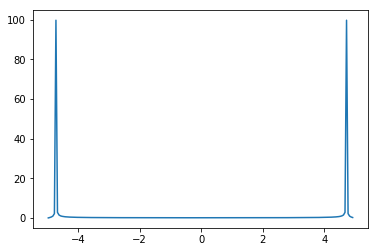

In [10]:
# This plot still looks screwed up because we're only using np.abs.
# We need to also apply the shift.
plt.plot(x_values, np.abs(fy))

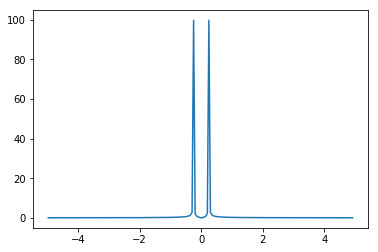

In [11]:
plt.plot(x_values, fftshift(np.abs(fy)))

All the FFT functions return values like this; this is just something you have to do.

## Challenges

1. Load the slide scan data we used in lesson 1 and convert it to grayscale. Now take the FFT and plot both the image and the FFT magnitude.

```python
# Hint
from skimage import io
from skimage.color import rgb2gray

image = io.imread('../data/bear_kidney.png')
image = rgb2gray(image)
```

1. How does the FFT of the cells look different from the camera image we looked at above? Why?
1. Apply a gaussian filter to the image (skimage.filters.gaussian). What happens to the FFT magnitude? Why?
1. Look at the FFT magnitude of the original moonlanding.png example from lesson 1. What do you think is going on with the image?

```python
# Hint
image = io.imread('../data/moonlanding.png')
```

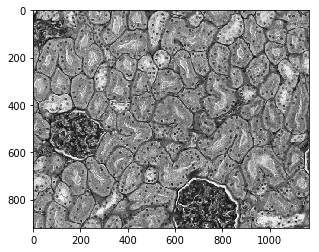

In [12]:
from skimage import io
from skimage.color import rgb2gray
image = io.imread('../data/bear_kidney.png')
image = rgb2gray(image)
plt.imshow(image, cmap="gray")

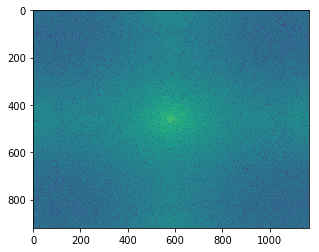

In [13]:
im_fft = fftshift(fftn(image))
im = np.abs(im_fft)
plt.imshow(np.log(im))
# No sharp lines visible here unlike our previous image.

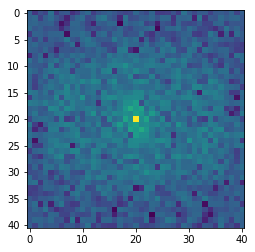

In [14]:
def crop_center(im, x=20, y=20):
    mid = (np.array(im.shape) / 2).astype(np.int)
    return im[mid[0]-x:mid[0]+x+1,
              mid[1]-y:mid[1]+y+1]
plt.imshow(np.log(crop_center(im)))

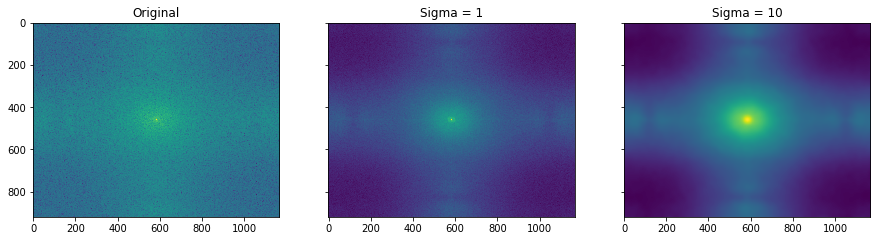

In [15]:
from skimage.filters import gaussian
fig, ax = plt.subplots(ncols=3, figsize=(15, 10), sharey=True)
ax[0].imshow(np.log(im))
ax[1].imshow(np.log(gaussian(im)))
ax[2].imshow(np.log(gaussian(im, sigma=10)))
for i, title in enumerate(['Original', 'Sigma = 1', 'Sigma = 10']):
    ax[i].set_title(title)

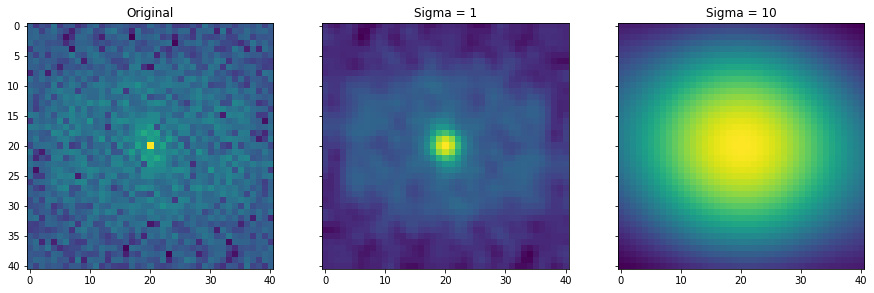

In [16]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 10), sharey=True)
ax[0].imshow(np.log(crop_center(im)))
ax[1].imshow(np.log(gaussian(crop_center(im))))
ax[2].imshow(np.log(gaussian(crop_center(im), sigma=10)))
for i, title in enumerate(['Original', 'Sigma = 1', 'Sigma = 10']):
    ax[i].set_title(title)

In [17]:
list(enumerate(['Original', 'Sigma = 1', 'Sigma = 10']))

[(0, 'Original'), (1, 'Sigma = 1'), (2, 'Sigma = 10')]

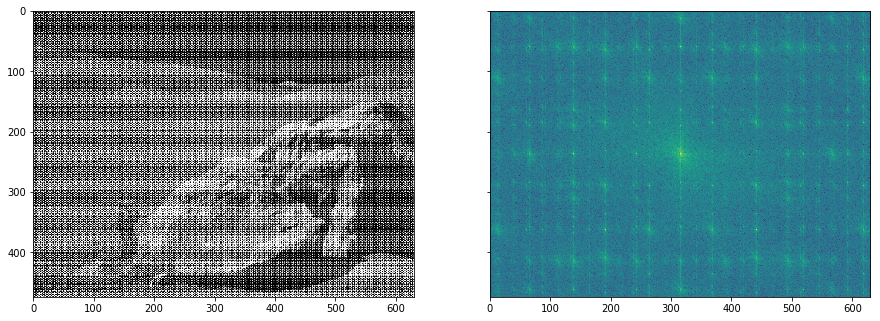

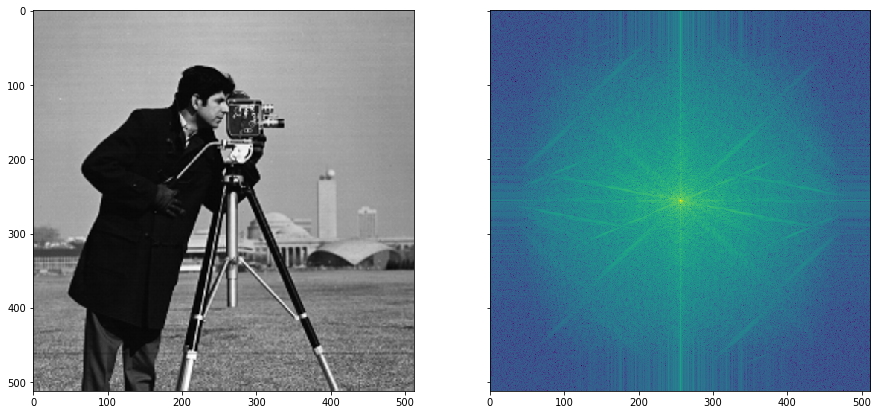

In [18]:
from  skimage import data

image = io.imread('../data/moonlanding.png')
im_fft = fftshift(fftn(image))
im = np.abs(im_fft)
fig, ax = plt.subplots(ncols=2, figsize=(15, 10), sharey=True)
ax[0].imshow(image, cmap='gray')
ax[1].imshow(np.log(im))
# Compare with the camera guy.
camera = rgb2gray(data.camera()) # get image
im = np.abs(fftshift(fftn(camera))) # get fft magnitude
fig, ax = plt.subplots(ncols=2, figsize=(15, 10), sharey=True)
ax[0].imshow(camera, cmap='gray')
ax[1].imshow(np.log(im))